In [ ]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from scipy.integrate import quad
from scipy import linalg as LA
import scipy.stats as stats
plt.style.use("ggplot")

## MCMC
sampling from mulit-gaussian distribution

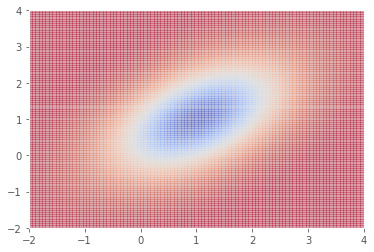

In [ ]:
mu = np.array([1,1])
S = np.array([[1, 0.5],
              [0.5, 1]])

def multi_gauss(x, y):
  return stats.multivariate_normal(mu, S).pdf([x, y])

X, Y = np.meshgrid(np.linspace(-2, 4, 100), np.linspace(-2,4,100))
Z = np.vectorize(multi_gauss)(X,Y)

plt.xlim(-2, 4)
plt.ylim(-2, 4)
plt.pcolor(X,Y,Z, alpha=0.3, cmap=cm.coolwarm_r)
plt.show()

### random wark

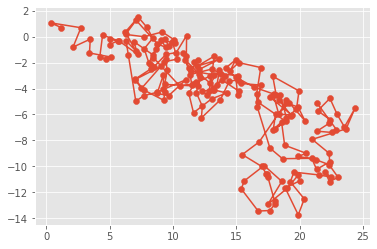

In [ ]:
# inital value
x = [-1,1]
plot = []
for i in range(200):
  new_x = x + np.random.multivariate_normal([0,0], [[1,0], [0,1]])
  plot.append(new_x)
  x = new_x
plot = np.array(plot)

plt.plot(plot[:,0], plot[:,1])
plt.scatter(plot[:,0], plot[:,1])
plt.show()

### Metropolis Algorithm

In [ ]:
x = [-1,1]
print(*x)

-1 1


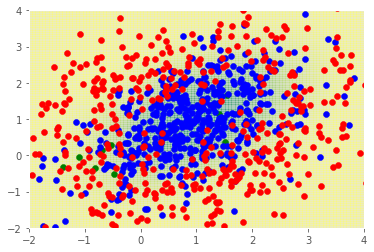

In [ ]:
x = [-1,-1]
adopt = []
reject = []
for i in range(1000):
  new_x = x + np.random.multivariate_normal([0,0], [[1,0], [0,1]])
  a = min(1, multi_gauss(*new_x)/multi_gauss(*x))
  if np.random.uniform(0,1) < a:
    adopt.append(new_x)
    x = new_x
  else:
    reject.append(new_x)

adopt = np.array(adopt)
reject = np.array(reject)

N = 10

X, Y = np.meshgrid(np.linspace(-2, 4, 100), np.linspace(-2,4,100))
Z = np.vectorize(multi_gauss)(X,Y)

plt.xlim(-2, 4)
plt.ylim(-2, 4)
plt.pcolor(X,Y,Z, alpha=0.3, cmap=cm.summer_r)
plt.scatter(adopt[:N, 0], adopt[:N, 1], c = "g")
plt.scatter(adopt[N:, 0], adopt[N:, 1], c="b")
plt.scatter(reject[N:, 0], reject[N:, 1], c="r")
plt.show()

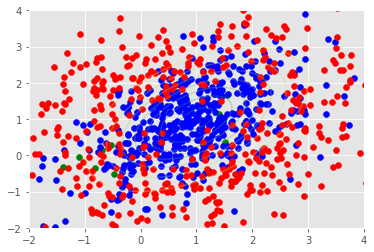

In [ ]:

X, Y = np.meshgrid(np.linspace(-2, 4, 100), np.linspace(-2,4,100))
Z = np.vectorize(multi_gauss)(X,Y)

plt.xlim(-2, 4)
plt.ylim(-2, 4)
plt.contour(X,Y,Z, alpha=0.3, cmap=cm.summer_r)
plt.scatter(adopt[:N, 0], adopt[:N, 1], c = "g")
plt.scatter(adopt[N:, 0], adopt[N:, 1], c="b")
plt.scatter(reject[N:, 0], reject[N:, 1], c="r")
plt.show()